In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from datetime import datetime



In [2]:
# read csv files and store into panadas DataFrame
countries_dataset = pd.read_csv("Resources/countries.csv")
countries_dataset.head()


,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [3]:
covid_cases_dataset = pd.read_csv("Resources/WHO COVID-19 cases.csv")
covid_cases_dataset.head()


,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [4]:
#Rename columns in countries dataset
countries_dataset = countries_dataset.rename(columns ={'country':'Country_code','name':'Country'})
countries_dataset.head()

,Country_code,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [5]:
#Merge the datasets
complete_dataset = pd.merge(covid_cases_dataset, countries_dataset, on = ["Country_code", "Country_code"])
complete_dataset.head()

,Date_reported,Country_code,Country_x,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,latitude,longitude,Country_y
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953,Afghanistan


In [6]:
#drop unneccessary columns
complete_dataset = complete_dataset.drop(columns={"Country_y"})
complete_dataset.head()

,Date_reported,Country_code,Country_x,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,latitude,longitude
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953


In [7]:
#rename the columns
complete_dataset = complete_dataset.rename(columns={"Date_reported":"Date","Country_code":"Country Code","Country_x":"Country","WHO_region":"WHO Region",
                                                    "New_cases":"New Cases","Cumulative_cases":"Cumulative Cases","New_deaths":"New Deaths","Cumulative_deaths":"Cumulative Deaths",
                                                    "latitude":"Latitude","longitude":"Longtitude"})
complete_dataset.head()

,Date,Country Code,Country,Continent,WHO Region,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,Latitude,Longtitude
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0,33.93911,67.709953


In [8]:
#identify emty and Nan rows
complete_dataset.count()


Date                 55632
Country Code         55388
Country              55632
Continent            55632
WHO Region           51728
New Cases            38384
Cumulative Cases     55632
New Deaths           24845
Cumulative Deaths    55632
Latitude             55632
Longtitude           55632
dtype: int64

In [9]:
#drop incomplete rows
complete_dataset=complete_dataset.dropna(how ='any')

#verify all the incomplete values removed
complete_dataset.count()

Date                 23771
Country Code         23771
Country              23771
Continent            23771
WHO Region           23771
New Cases            23771
Cumulative Cases     23771
New Deaths           23771
Cumulative Deaths    23771
Latitude             23771
Longtitude           23771
dtype: int64

In [10]:
#check the datatypes
complete_dataset.dtypes

Date                  object
Country Code          object
Country               object
Continent             object
WHO Region            object
New Cases            float64
Cumulative Cases       int64
New Deaths           float64
Cumulative Deaths      int64
Latitude             float64
Longtitude           float64
dtype: object

In [11]:
#change date data types
complete_dataset['Date'] = pd.to_datetime(complete_dataset['Date'])

#check if date datatypes changes
complete_dataset.dtypes

Date                 datetime64[ns]
Country Code                 object
Country                      object
Continent                    object
WHO Region                   object
New Cases                   float64
Cumulative Cases              int64
New Deaths                  float64
Cumulative Deaths             int64
Latitude                    float64
Longtitude                  float64
dtype: object

In [12]:
#aggregation: group by country
country_group_data = complete_dataset.groupby('Country').agg({
    'New Cases':['sum', 'mean'],
    'New Deaths':['sum','mean'],
})
country_group_data.head()

New Cases              New Deaths           
                     sum         mean        sum       mean
Country                                                    
Afghanistan     231053.0  1161.070352     7998.0  40.190955
Albania         327824.0  2521.723077     3605.0  27.730769
Algeria         266810.0  2403.693694     6881.0  61.990991
American Samoa    5772.0   524.727273       34.0   3.090909
Andorra          34226.0   561.081967      159.0   2.606557

In [13]:
#use aggregation to find the max,min cases and deaths all over the world
country_stats = complete_dataset.groupby('Country').agg({
    'Cumulative Cases': 'max',  
    'Cumulative Deaths': 'max'  
}).reset_index()

# Find the country with maximum cases
max_cases_country = country_stats.loc[country_stats['Cumulative Cases'].idxmax()]

# Find the country with minimum cases
min_cases_country = country_stats.loc[country_stats['Cumulative Cases'].idxmin()]

# Find the country with maximum deaths
max_deaths_country = country_stats.loc[country_stats['Cumulative Deaths'].idxmax()]

# Find the country with minimum deaths
min_deaths_country = country_stats.loc[country_stats['Cumulative Deaths'].idxmin()]

# Display Results
print("Country with Maximum Cases:", max_cases_country)
print("\nCountry with Minimum Cases:", min_cases_country)
print("\nCountry with Maximum Deaths:", max_deaths_country)
print("\nCountry with Minimum Deaths:", min_deaths_country)


Country with Maximum Cases: Country              United States of America
Cumulative Cases                    103436829
Cumulative Deaths                     1127152
Name: 196, dtype: object

Country with Minimum Cases: Country              Montserrat
Cumulative Cases           1003
Cumulative Deaths             8
Name: 124, dtype: object

Country with Maximum Deaths: Country              United States of America
Cumulative Cases                    103436829
Cumulative Deaths                     1127152
Name: 196, dtype: object

Country with Minimum Deaths: Country              Nauru
Cumulative Cases      3970
Cumulative Deaths        1
Name: 128, dtype: object


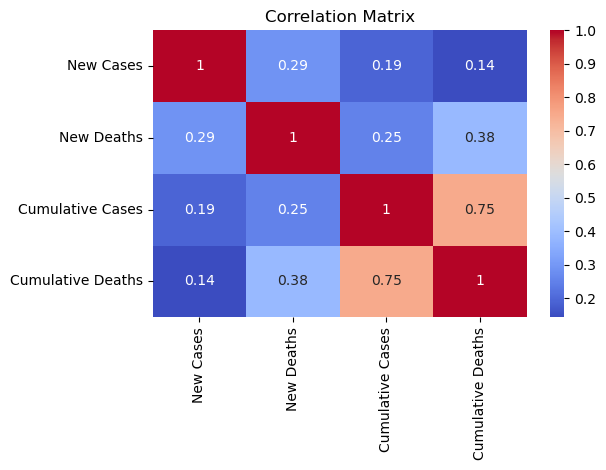

In [14]:
#correlation between new cases and new deaths
correlation = complete_dataset[['New Cases', 'New Deaths', 'Cumulative Cases', 'Cumulative Deaths']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Save the heatmap as a PNG file
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

In [15]:
#filter by country Australia
australia_data = complete_dataset[complete_dataset['Country'] == 'Australia']

australia_data.head()


,Date,Country Code,Country,Continent,WHO Region,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,Latitude,Longtitude
2693,2020-03-08,AU,Australia,Oceania,WPRO,45.0,70,4.0,4,-25.274398,133.775136
2694,2020-03-15,AU,Australia,Oceania,WPRO,179.0,249,3.0,7,-25.274398,133.775136
2695,2020-03-22,AU,Australia,Oceania,WPRO,832.0,1081,2.0,9,-25.274398,133.775136
2696,2020-03-29,AU,Australia,Oceania,WPRO,2728.0,3809,7.0,16,-25.274398,133.775136
2697,2020-04-05,AU,Australia,Oceania,WPRO,1826.0,5635,20.0,36,-25.274398,133.775136


In [16]:
 #Calculate the average new cases in total in Australia
average_cases = australia_data['New Cases'].mean()
print(f"Average COVID-19 cases in Australia: {average_cases:.2f}")

# Find the day with maximum cases
max_cases_day = australia_data.loc[australia_data['New Cases'].idxmax()]
print(f"Maximum cases: {max_cases_day['New Cases']} on {max_cases_day['Date'].date()}")

# Find the day with minimum cases
min_cases_day = australia_data.loc[australia_data['New Cases'].idxmin()]
print(f"Minimum cases: {min_cases_day['New Cases']} on {min_cases_day['Date'].date()}")

# Find the day with maximum deaths
max_deaths_day = australia_data.loc[australia_data['New Deaths'].idxmax()]
print(f"Maximum deaths: {max_deaths_day['New Deaths']} on {max_deaths_day['Date'].date()}")

# Find the day with minimum deaths
min_deaths_day = australia_data.loc[australia_data['New Deaths'].idxmin()]
print(f"Minimum deaths: {min_deaths_day['New Deaths']} on {min_deaths_day['Date'].date()}")

Average COVID-19 cases in Australia: 64275.34
Maximum cases: 588813.0 on 2022-01-09
Minimum cases: 28.0 on 2021-02-21
Maximum deaths: 1161.0 on 2023-02-05
Minimum deaths: -76.0 on 2023-07-23


In [17]:
#using pivot_table() for summarised the data. this is new not used in the class
pivot_summary = australia_data.pivot_table(
    index='Date', values=['New Cases', 'New Deaths'], aggfunc='sum'
)
pivot_summary

,New Cases,New Deaths
Date,,
2020-03-08,45.0,4.0
2020-03-15,179.0,3.0
2020-03-22,832.0,2.0
2020-03-29,2728.0,7.0
2020-04-05,1826.0,20.0
...,...,...
2024-04-21,4424.0,34.0
2024-04-28,4657.0,21.0
2024-05-05,4866.0,16.0


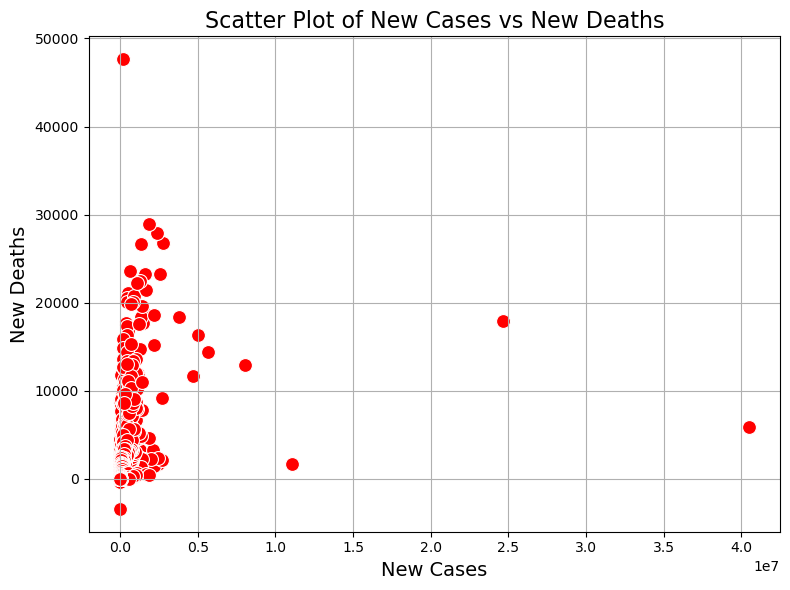

In [21]:
# Scatter Plot: New Cases vs New Deaths
plt.figure(figsize=(8, 6))
sns.scatterplot(data=complete_dataset, x='New Cases', y='New Deaths', color='red', s=100)
plt.title('Scatter Plot of New Cases vs New Deaths', fontsize=16)
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('New Deaths', fontsize=14)

## Save the heatmap as a PNG file
plt.tight_layout()
plt.savefig('Scateer Plot of New Cases vs New Deaths.png', dpi=300)
plt.grid()
plt.show()

In [19]:
complete_dataset.head()

,Date,Country Code,Country,Continent,WHO Region,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,Latitude,Longtitude
12,2020-03-29,AF,Afghanistan,Asia,EMRO,67.0,91,2.0,2,33.93911,67.709953
13,2020-04-05,AF,Afghanistan,Asia,EMRO,183.0,274,3.0,5,33.93911,67.709953
14,2020-04-12,AF,Afghanistan,Asia,EMRO,247.0,521,10.0,15,33.93911,67.709953
15,2020-04-19,AF,Afghanistan,Asia,EMRO,387.0,908,15.0,30,33.93911,67.709953
16,2020-04-26,AF,Afghanistan,Asia,EMRO,422.0,1330,13.0,43,33.93911,67.709953


In [20]:
#convert complete dataset into csv file
complete_dataset.to_csv('complete_dataset.csv', index = False)
